In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
car=pd.read_csv('car.csv')
car.head()

,Unnamed: 0,Unnamed: 0.1,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


###### Data Cleaning

In [3]:
car.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [4]:
car.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [5]:
car.Mileage=car.Mileage.astype('str')

In [6]:
car['Mileage']=car.Mileage.apply(lambda x: x.split('k')[0])

In [7]:
car.Mileage=car.Mileage.astype('float')

In [8]:
car.Engine=car.Engine.astype('str')

In [9]:
car['Engine']=car.Engine.apply(lambda x: x.split('C')[0])

In [10]:
car.Engine=car.Engine.astype('float')

In [11]:
car.Power=car.Power.astype('str')

In [12]:
car['Power']=car.Power.apply(lambda x: x.split('b')[0])

In [13]:
car['Power'].str.contains('null').sum()


129

In [14]:
car.Power[car['Power'].str.contains('null')]

76      null 
79      null 
89      null 
120     null 
143     null 
        ...  
6891    null 
6896    null 
6947    null 
7092    null 
7145    null 
Name: Power, Length: 129, dtype: object

In [15]:
car.Power.replace('null',np.nan,inplace=True,regex=True)

In [16]:
car.Power=car.Power.astype('float')

In [17]:
car['Power'] = car['Power'].abs()
car['Price'] = car['Price'].abs()
car['Mileage'] = car['Mileage'].abs()
car['Kilometers_Driven'] = car['Kilometers_Driven'].abs()
car['Engine'] = car['Engine'].abs()

In [18]:
car.drop('New_Price',axis=1,inplace=True) #more than 80% of the data is missing so it is advisable to drop this column

###### Categorical Data into Numerical Data

In [19]:
uniqueValues_Fuel_Type = car['Fuel_Type'].unique()
uniqueValues_Fuel_Type

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [20]:
fuel = pd.get_dummies(car['Fuel_Type'])
fuel.head(2)

,CNG,Diesel,Electric,LPG,Petrol
0,1,0,0,0,0
1,0,1,0,0,0


In [21]:
trans_type=pd.get_dummies(car['Transmission'])
trans_type.head(2)

,Automatic,Manual
0,0,1
1,0,1


In [22]:
car['Owner_Type'].value_counts()


First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [23]:
car.Owner_Type=car.Owner_Type.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4})


In [24]:
car['Location'].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [25]:
Locations=pd.get_dummies(car['Location'])
Locations.head(2)

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1


In [26]:
car['Name'].value_counts() 

Mahindra XUV500 W8 2WD                   55
Maruti Swift VDI                         49
Maruti Swift Dzire VDI                   42
Honda City 1.5 S MT                      39
Maruti Swift VDI BSIV                    37
                                         ..
Hyundai Sonata Embera 2.4L MT             1
Hyundai Grand i10 1.2 CRDi Asta           1
Jeep Compass 2.0 Limited Option Black     1
Jeep Compass 1.4 Sport                    1
Hyundai EON 1.0 Era Plus                  1
Name: Name, Length: 2041, dtype: int64

In [27]:
car.drop("Name",axis=1,inplace=True)

In [28]:
car.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50


##### Data Imputation

In [29]:
car['Mileage']=car.Mileage.replace(0,np.nan)


In [30]:
car.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
Price                1234
dtype: int64

In [31]:
car['median']=car.Mileage.fillna(car.Mileage.median())
car['mode']=car.Mileage.fillna(car.Mileage.mode()[0])

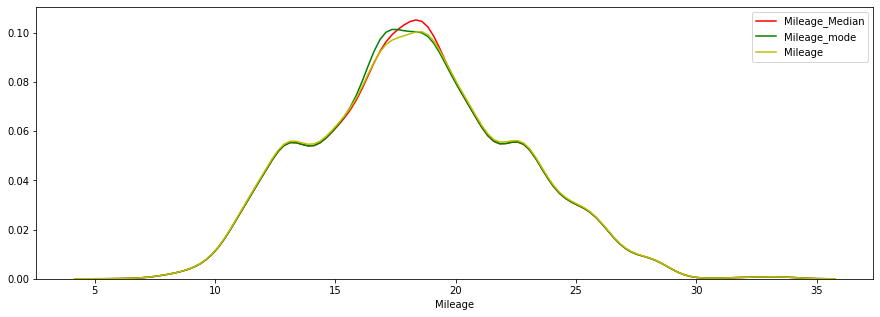

In [32]:
fig=plt.figure(figsize=(15,5))
sns.distplot(car['median'],hist=False,color='r',label='Mileage_Median')
sns.distplot(car['mode'],hist=False,color='g',label='Mileage_mode')
sns.distplot(car['Mileage'],hist=False,color='y',label='Mileage');

In [33]:
car['Mileage']=car.Mileage.fillna(car.Mileage.mode()[0])

In [34]:
car['Engine_median']=car.Engine.fillna(car.Engine.median())

In [35]:
car['Engine_mode']=car.Engine.fillna(car.Engine.mode()[0])

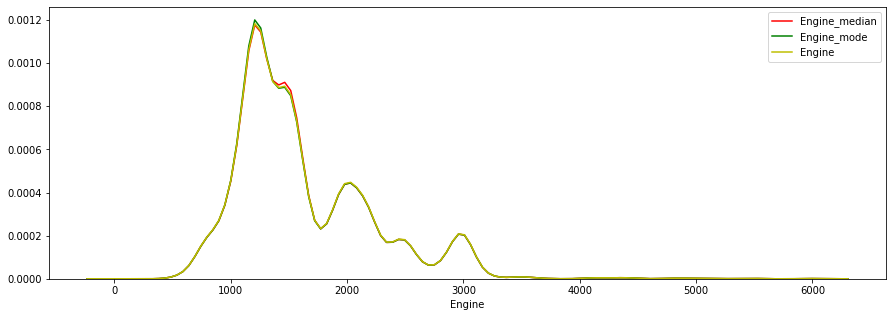

In [36]:
fig=plt.figure(figsize=(15,5))
sns.distplot(car['Engine_median'],hist=False,color='r',label='Engine_median')
sns.distplot(car['Engine_mode'],hist=False,color='g',label='Engine_mode')
sns.distplot(car['Engine'],hist=False,color='y',label='Engine');

In [37]:
car['Engine']=car.Engine.fillna(car.Engine.mode()[0])

In [38]:
car.drop(['Engine_median','Engine_mode','median','mode'],axis=1,inplace=True)

In [39]:
car['Power_median']=car.Power.fillna(car.Power.median())
car['Power_mode']=car.Power.fillna(car.Power.mode()[0])

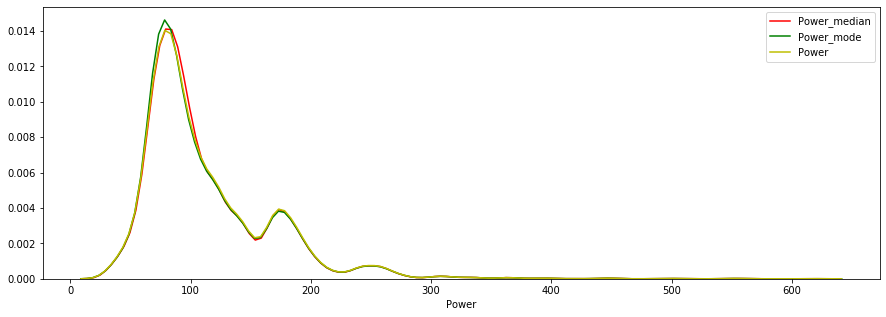

In [40]:
fig=plt.figure(figsize=(15,5))
sns.distplot(car['Power_median'],hist=False,color='r',label='Power_median')
sns.distplot(car['Power_mode'],hist=False,color='g',label='Power_mode')
sns.distplot(car['Power'],hist=False,color='y',label='Power');

In [41]:
car['Power']=car.Power.fillna(car.Power.median())

In [42]:
car.drop(['Power_median','Power_mode'],axis=1,inplace=True)

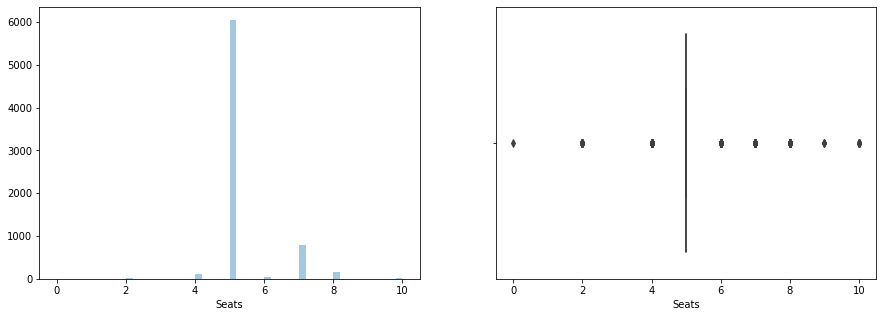

In [43]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(car.Seats,kde=False,ax=axes[0])
sns.boxplot(car.Seats,ax=axes[1]);

In [44]:
car.drop(['Seats'],axis=1,inplace=True)

In [45]:
car['Price_median']=car.Price.fillna(car.Price.median())
car['Price_mode']=car.Price.fillna(car.Price.mode()[0])


In [46]:
Price_sampled = car['Price'].dropna().sample(car['Price'].isnull().sum(), random_state=0)
Price_sampled.index = car[car['Price'].isnull()].index

In [47]:
car['Price_imputed'] = car['Price'].copy()
car.loc[car['Price'].isnull(), 'Price_imputed'] = Price_sampled

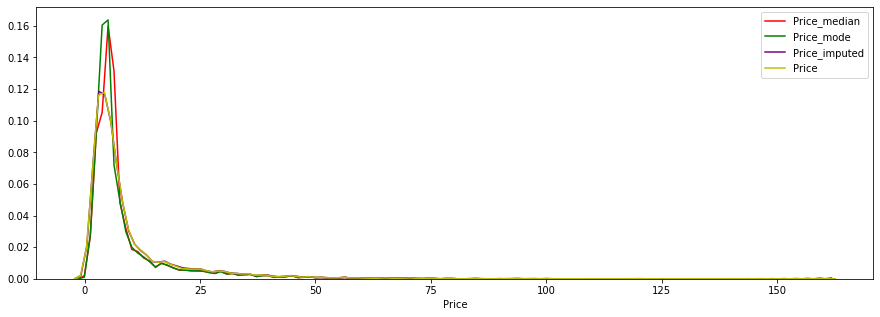

In [48]:
fig=plt.figure(figsize=(15,5))
sns.distplot(car['Price_median'],hist=False,color='r',label='Price_median')
sns.distplot(car['Price_mode'],hist=False,color='g',label='Price_mode')
sns.distplot(car['Price_imputed'],hist=False,color='purple',label='Price_imputed')
sns.distplot(car['Price'],hist=False,color='y',label='Price');

In [49]:
car.loc[car['Price'].isnull(), 'Price'] = Price_sampled

In [50]:
car.drop(['Price_imputed','Price_median','Price_mode'],axis=1,inplace=True)

In [51]:
car.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Price                0
dtype: int64

###### Gaussian Distribution/ Normal Distribution

In [52]:
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)


    plt.show()

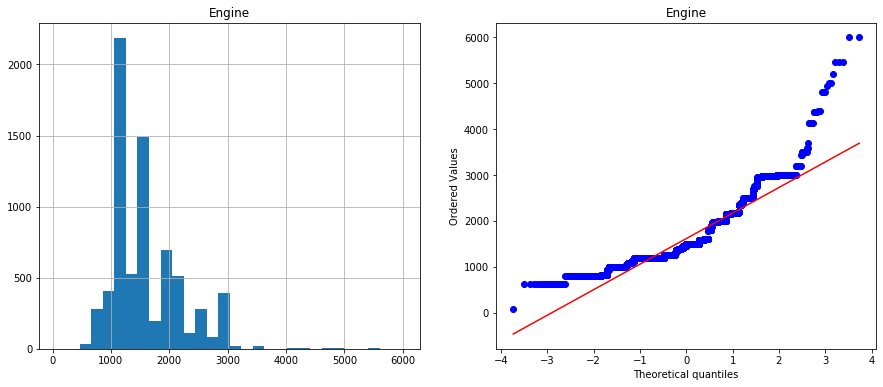

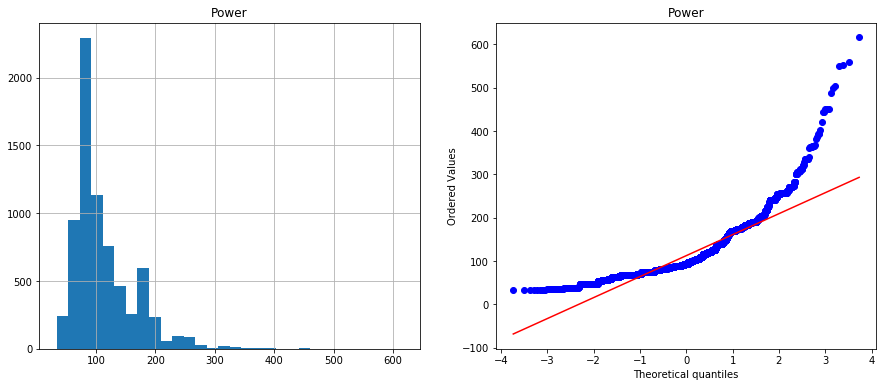

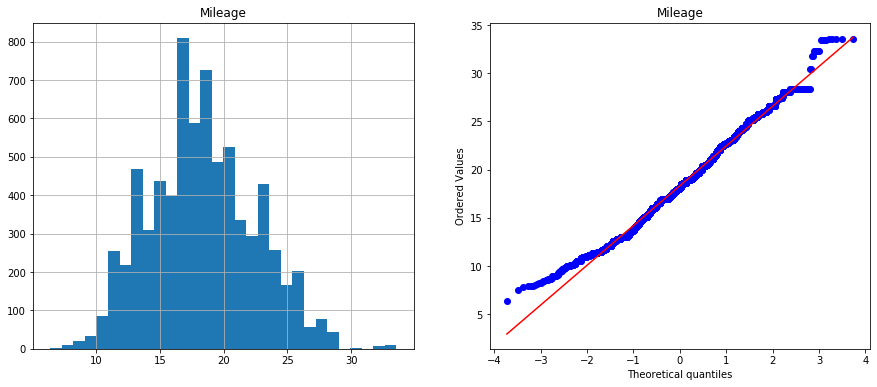

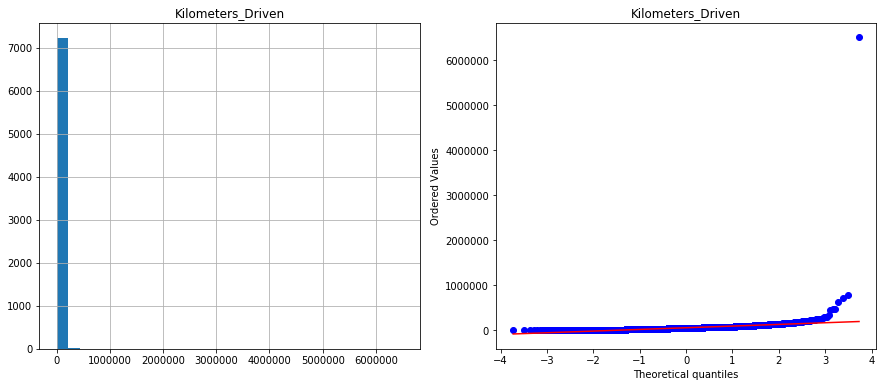

In [53]:
plots(car,'Engine')
plots(car,'Power')
plots(car,'Mileage')
plots(car,'Kilometers_Driven')

In [54]:
car_copy=car.copy(deep=True)

In [55]:
car_copy['Engine'] = np.log(car_copy['Engine'])
car_copy['Power'] = np.log(car_copy['Power'])
car_copy['Mileage'] = np.log(car_copy['Mileage'])
car_copy['Kilometers_Driven'] = np.log(car_copy['Kilometers_Driven'])

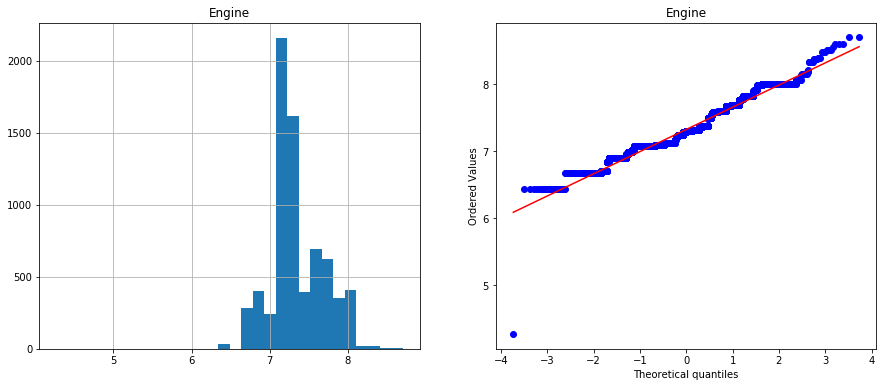

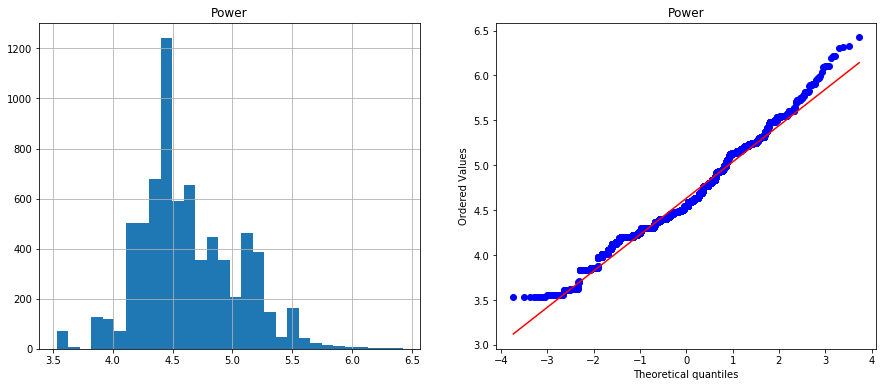

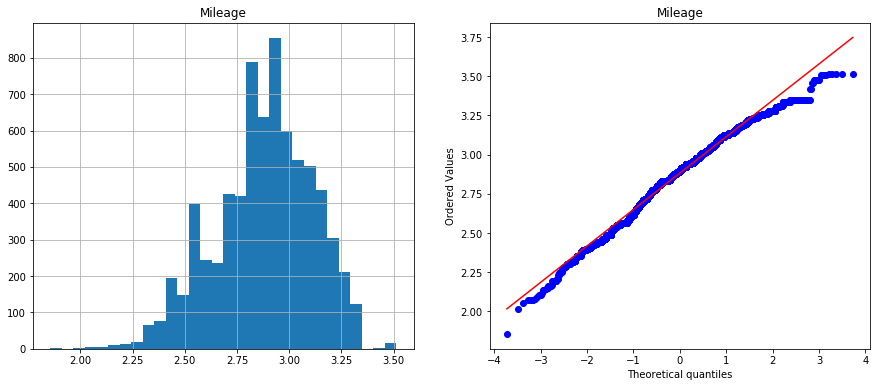

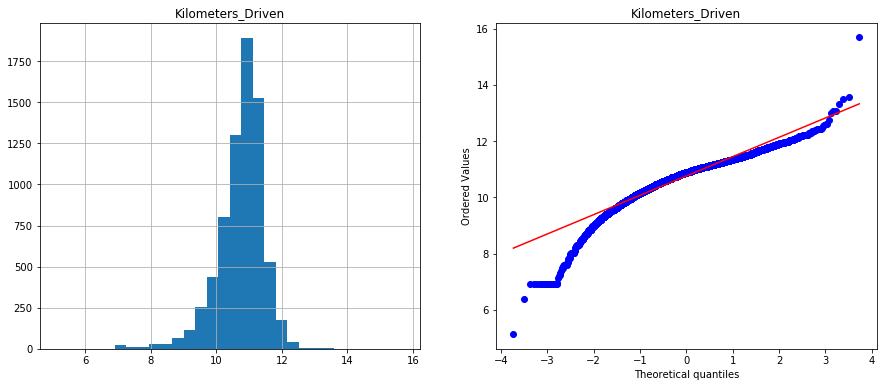

In [56]:
plots(car_copy,'Engine')
plots(car_copy,'Power')
plots(car_copy,'Mileage')
plots(car_copy,'Kilometers_Driven')

##### Detecting and Removing Outliers

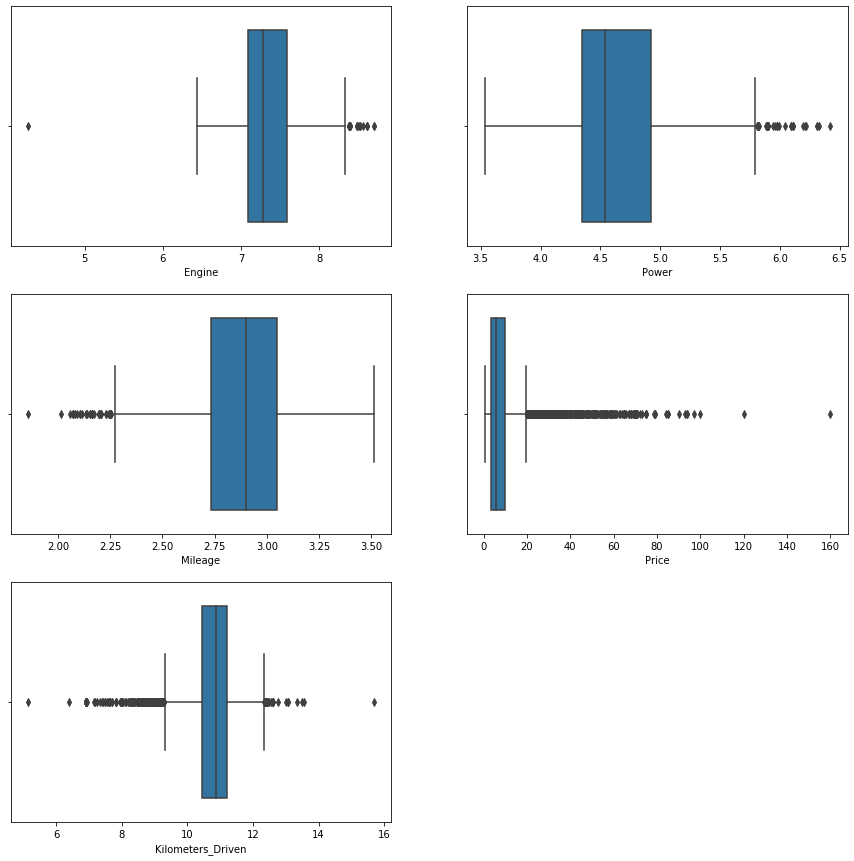

In [57]:
fig=plt.figure(figsize=(15,15))
a1=plt.subplot(3,2,1)
a2=plt.subplot(3,2,2)
a3=plt.subplot(3,2,3)
a4=plt.subplot(3,2,4)
a5=plt.subplot(3,2,5)

sns.boxplot(car_copy.Engine,ax=a1)
sns.boxplot(car_copy.Power,ax=a2)
sns.boxplot(car_copy.Mileage,ax=a3)
sns.boxplot(car_copy.Price,ax=a4)
sns.boxplot(car_copy.Kilometers_Driven,ax=a5);

In [58]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [59]:
Engine_upper_limit, Engine_lower_limit = find_skewed_boundaries(car_copy, 'Engine', 1.5)
Engine_upper_limit, Engine_lower_limit

(8.330572135693536, 6.341774647476634)

In [60]:
car_copy['Engine']= np.where(car_copy['Engine'] > Engine_upper_limit, Engine_upper_limit,
                       np.where(car_copy['Engine'] < Engine_lower_limit, Engine_lower_limit, car_copy['Engine']))

In [61]:
Power_upper_limit, Power_lower_limit = find_skewed_boundaries(car_copy, 'Power', 1.5)
Power_upper_limit, Power_lower_limit

(5.80296949930819, 3.46830697538098)

In [62]:
car_copy['Power']= np.where(car_copy['Power'] > Power_upper_limit, Power_upper_limit,
                       np.where(car_copy['Power'] < Power_lower_limit, Power_lower_limit, car_copy['Power']))

In [63]:
Mileage_upper_limit, Mileage_lower_limit = find_skewed_boundaries(car_copy, 'Mileage', 1.5)
Mileage_upper_limit, Mileage_lower_limit

(3.5216313370756764, 2.262009212825928)

In [64]:
car_copy['Mileage']= np.where(car_copy['Mileage'] > Mileage_upper_limit, Mileage_upper_limit,
                       np.where(car_copy['Mileage'] < Mileage_lower_limit, Mileage_lower_limit, car_copy['Mileage']))

In [65]:
Price_upper_limit, Price_lower_limit = find_skewed_boundaries(car_copy, 'Price', 1.5)
Price_upper_limit, Price_lower_limit

(19.75, -6.25)

In [66]:
car_copy['Price']= np.where(car_copy['Price'] > Price_upper_limit, Price_upper_limit,
                       np.where(car_copy['Price'] < Price_lower_limit, Price_lower_limit, car_copy['Price']))

In [67]:
Kilometers_Driven_upper_limit, Kilometers_Driven_lower_limit = find_skewed_boundaries(car_copy, 'Kilometers_Driven', 1.5)
Kilometers_Driven_upper_limit, Kilometers_Driven_lower_limit

(12.34436309492887, 9.287967428799956)

In [68]:
car_copy['Kilometers_Driven']= np.where(car_copy['Kilometers_Driven'] > Kilometers_Driven_upper_limit, Kilometers_Driven_upper_limit,
                       np.where(car_copy['Kilometers_Driven'] < Kilometers_Driven_lower_limit, Kilometers_Driven_lower_limit, car_copy['Kilometers_Driven']))

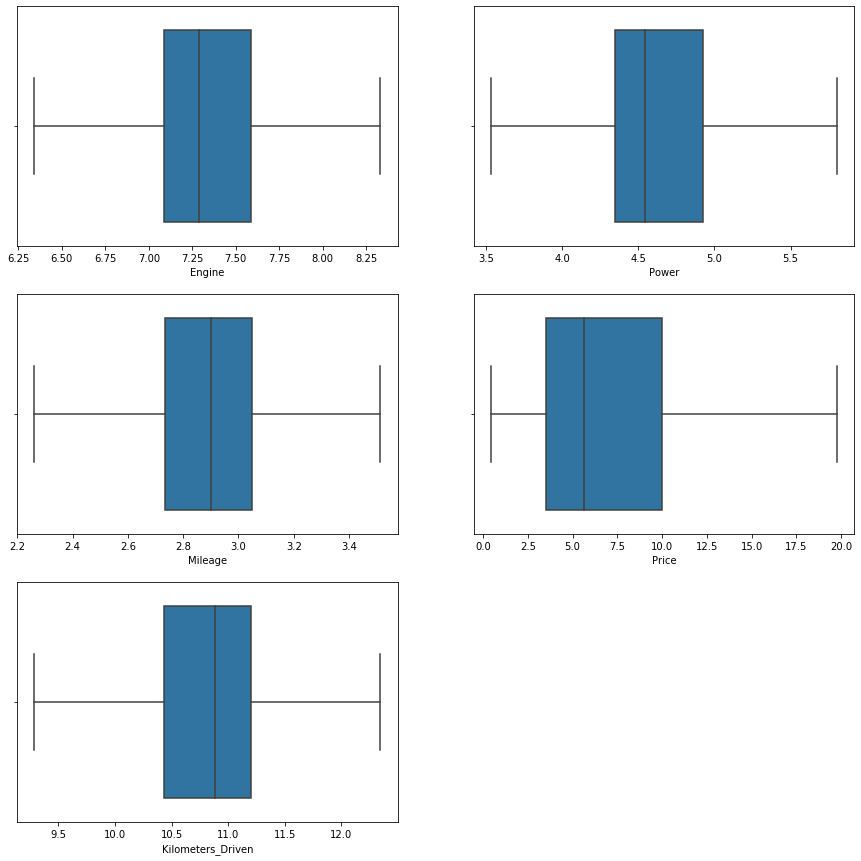

In [69]:
fig=plt.figure(figsize=(15,15))
a1=plt.subplot(3,2,1)
a2=plt.subplot(3,2,2)
a3=plt.subplot(3,2,3)
a4=plt.subplot(3,2,4)
a5=plt.subplot(3,2,5)

sns.boxplot(car_copy.Engine,ax=a1)
sns.boxplot(car_copy.Power,ax=a2)
sns.boxplot(car_copy.Mileage,ax=a3)
sns.boxplot(car_copy.Price,ax=a4)
sns.boxplot(car_copy.Kilometers_Driven,ax=a5);

Removing the outliers from original dataset

In [70]:
Engine_upper_limit, Engine_lower_limit = find_skewed_boundaries(car, 'Engine', 1.5)
Engine_upper_limit, Engine_lower_limit

(3124.5, 40.5)

In [71]:
car['Engine']= np.where(car['Engine'] > Engine_upper_limit, Engine_upper_limit,
                       np.where(car['Engine'] < Engine_lower_limit, Engine_lower_limit, car['Engine']))

In [72]:
Power_upper_limit, Power_lower_limit = find_skewed_boundaries(car, 'Power', 1.5)
Power_upper_limit, Power_lower_limit

(229.575, -14.545000000000002)

In [73]:
car['Power']= np.where(car['Power'] > Power_upper_limit, Power_upper_limit,
                       np.where(car['Power'] < Power_lower_limit, Power_lower_limit, car['Power']))

In [74]:
Mileage_upper_limit, Mileage_lower_limit = find_skewed_boundaries(car, 'Mileage', 1.5)
Mileage_upper_limit, Mileage_lower_limit

(29.650000000000002, 6.85)

In [75]:
car['Mileage']= np.where(car['Mileage'] > Mileage_upper_limit, Mileage_upper_limit,
                       np.where(car['Mileage'] < Mileage_lower_limit, Mileage_lower_limit, car['Mileage']))

In [76]:
Price_upper_limit, Price_lower_limit = find_skewed_boundaries(car, 'Price', 1.5)
Price_upper_limit, Price_lower_limit

(19.75, -6.25)

In [77]:
car['Price']= np.where(car['Price'] > Price_upper_limit, Price_upper_limit,
                       np.where(car['Price'] < Price_lower_limit, Price_lower_limit, car['Price']))

In [78]:
Kilometers_Driven_upper_limit, Kilometers_Driven_lower_limit = find_skewed_boundaries(car, 'Kilometers_Driven', 1.5)
Kilometers_Driven_upper_limit, Kilometers_Driven_lower_limit

(131500.0, -24500.0)

In [79]:
car['Kilometers_Driven']= np.where(car['Kilometers_Driven'] > Kilometers_Driven_upper_limit, Kilometers_Driven_upper_limit,
                       np.where(car['Kilometers_Driven'] < Kilometers_Driven_lower_limit, Kilometers_Driven_lower_limit, car['Kilometers_Driven']))

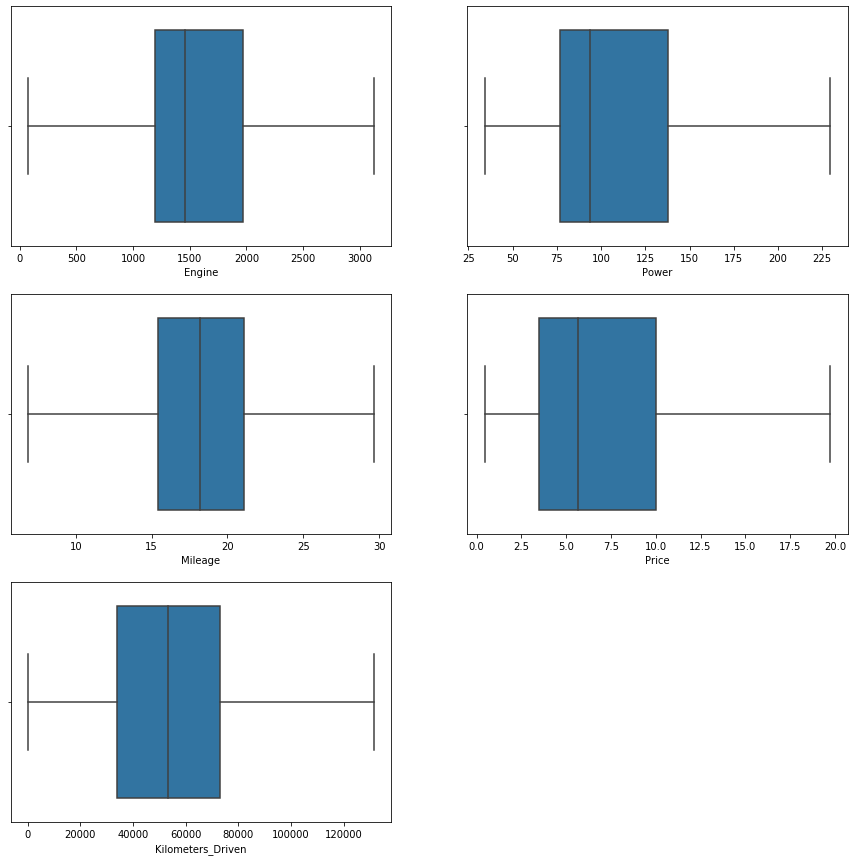

In [80]:
fig=plt.figure(figsize=(15,15))
a1=plt.subplot(3,2,1)
a2=plt.subplot(3,2,2)
a3=plt.subplot(3,2,3)
a4=plt.subplot(3,2,4)
a5=plt.subplot(3,2,5)

sns.boxplot(car.Engine,ax=a1)
sns.boxplot(car.Power,ax=a2)
sns.boxplot(car.Mileage,ax=a3)
sns.boxplot(car.Price,ax=a4)
sns.boxplot(car.Kilometers_Driven,ax=a5);

###### Feature Scaling


In [81]:
car_copy.drop(['Location','Year','Fuel_Type','Owner_Type','Transmission','Price'],axis=1,inplace=True)

In [82]:
scaler = StandardScaler()

In [83]:
scaled = scaler.fit_transform(car_copy)

In [84]:
car_copy = pd.DataFrame(scaled, columns=car_copy.columns)

In [85]:
car_copy.head()

,Kilometers_Driven,Mileage,Engine,Power
0,0.637828,1.719448,-1.258877,-1.395149
1,-0.262365,0.416084,0.118078,0.509169
2,-0.078409,0.080661,-0.710447,-0.357623
3,0.940361,0.651070,-0.590729,-0.355961
4,-0.275284,-0.697196,0.770635,0.778278


###### Final dataset


In [86]:
car_copy = pd.concat([Locations,car.Year,fuel,trans_type,car.Owner_Type,car_copy,car.Price], axis=1)

In [87]:
car_copy.describe()

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,...,LPG,Petrol,Automatic,Manual,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Price
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,...,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7.253000e+03,7.253000e+03,7.253000e+03,7.253000e+03,7253.000000
mean,0.037915,0.060665,0.081484,0.106439,0.090997,0.120778,0.068799,0.106439,0.090170,0.130842,...,0.001654,0.458431,0.282504,0.717496,1.201572,-5.781793e-16,-1.627449e-16,-1.235129e-15,9.705612e-16,7.759979
std,0.191005,0.238730,0.273595,0.308420,0.287624,0.325891,0.253130,0.308420,0.286444,0.337251,...,0.040645,0.498303,0.450248,0.450248,0.456808,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,5.827537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-2.393947e+00,-2.680577e+00,-2.944545e+00,-2.700401e+00,0.440000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-5.616514e-01,-6.407455e-01,-7.154368e-01,-7.053509e-01,3.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.605405e-01,7.115934e-02,-1.176988e-01,-2.149600e-01,5.650000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,6.598788e-01,7.191423e-01,7.706351e-01,7.294340e-01,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,2.492174e+00,2.720572e+00,2.999743e+00,2.881611e+00,19.750000


In [88]:
car_copy = pd.concat([Locations,fuel,trans_type,car], axis=1)

In [89]:
car_copy.drop(['Location','Transmission','Fuel_Type'],axis=1,inplace=True)

In [90]:
car_copy.describe()

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,...,Petrol,Automatic,Manual,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Price
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,...,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,0.037915,0.060665,0.081484,0.106439,0.090997,0.120778,0.068799,0.106439,0.090170,0.130842,...,0.458431,0.282504,0.717496,2013.365366,56277.365918,1.201572,18.323796,1606.363091,110.402768,7.759979
std,0.191005,0.238730,0.273595,0.308420,0.287624,0.325891,0.253130,0.308420,0.286444,0.337251,...,0.498303,0.450248,0.450248,3.254421,30187.237813,0.456808,4.113110,564.589752,45.948236,5.827537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1996.000000,171.000000,1.000000,6.850000,72.000000,34.200000,0.440000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2011.000000,34000.000000,1.000000,15.400000,1197.000000,77.000000,3.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2014.000000,53416.000000,1.000000,18.160000,1462.000000,94.000000,5.650000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,2016.000000,73000.000000,1.000000,21.100000,1968.000000,138.030000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2019.000000,131500.000000,4.000000,29.650000,3124.500000,229.575000,19.750000


##### Model 


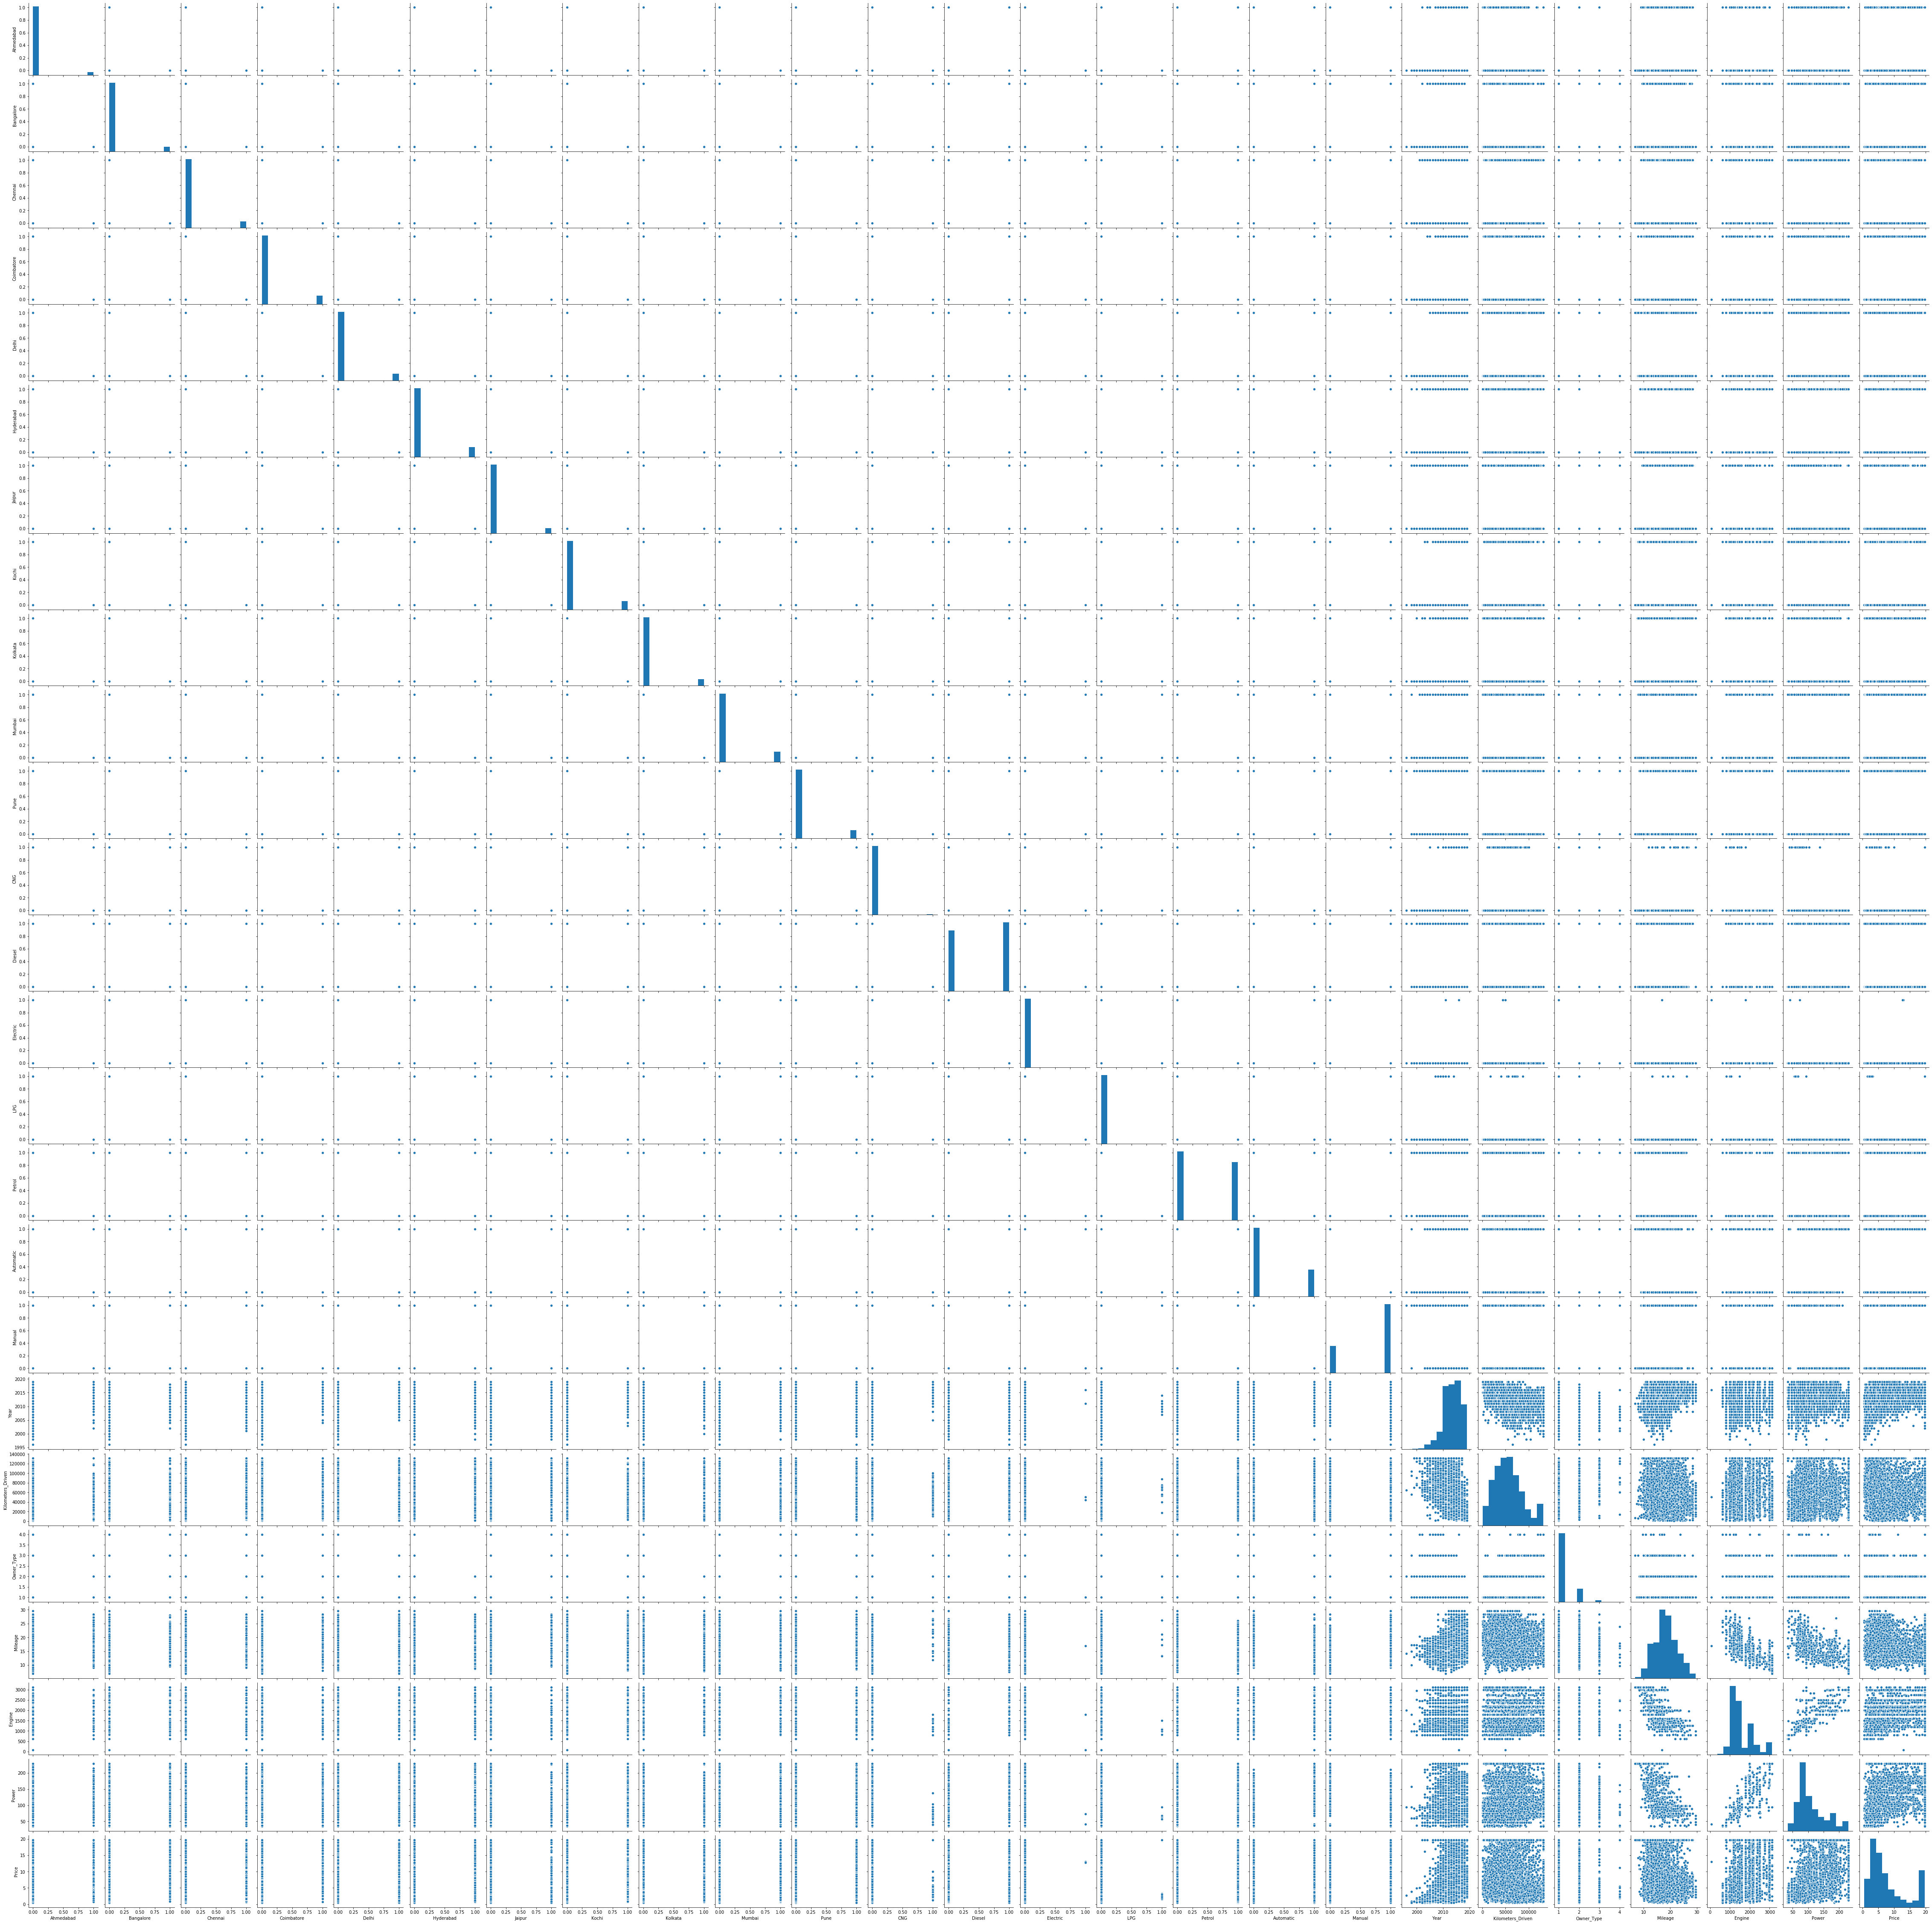

In [91]:
sns.pairplot(car_copy)

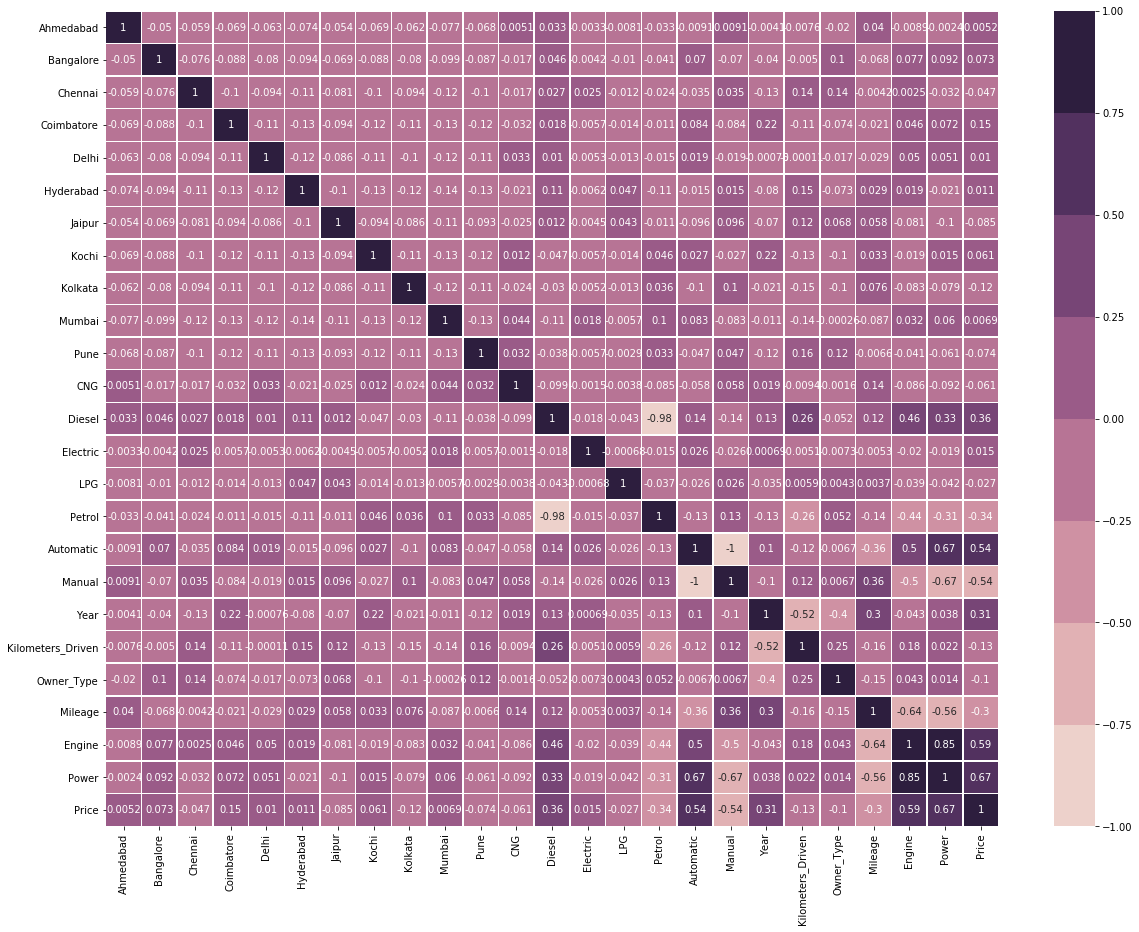

In [92]:
fig=plt.figure(figsize=(20,15))
sns.heatmap(car_copy.corr(),cmap=sns.cubehelix_palette(8),annot=True,linewidths=.5);

In [93]:
x = car_copy.iloc[:, :-1]
y = car_copy['Price']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [96]:
predictions = lm.predict(X_test)

In [97]:
from sklearn.metrics import r2_score
score=r2_score(y_test,predictions)
score

0.5520666130662544

In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)


{'alpha': 0.01}


In [100]:
prediction_lasso=lasso_regressor.predict(X_test)

score=r2_score(y_test,prediction_lasso)
score

0.5562669333387507